## Problem statement 

USA Housing data is dataset for multiple regression problem where column explained specification of the homes and pricing. We need to implement model from whcich we can predict pricing of the house accurately. 

Steps:
 1: Collect the data
 2. Seperate DV and IV
 3. Deal with missing values or anamoly in data (Imputet/Drop) ** NA in this case.**
 4. Encode Non Numeric Categorical data - create dummy IV ** Not used in this case**
 5. Eliminate non-influencing IV ** Not applicable in this case**
 6. Feature Scaling ** NA in this case **
 7. Apply Dimensionality Reduction ** Not used in this case **
 8. Split data for Train-Test Test
 9. Buils the Model, Check the Coeff and Intercepts
 10.Run the model on test data
 11.Tune the hyperparameters of the algorith and go to Step 9 till satisfactory accuracy
 12.Predict the Results

In [1]:
#Multiple Linear Regression
#Imporing the libraries
import numpy as np
import pandas as pd
import scipy as sp
# for exploratory data analytics
import matplotlib.pyplot as plt
import seaborn as sns
# for regression model
from sklearn.model_selection import cross_val_score
#for stats model and calculations
import statsmodels.regression.linear_model as sm


## Fetching Data

In [2]:
#importing the dataset
df=pd.read_csv('USA_Housing.csv') # read the csv file and assign it to pandas dataframe as dataset
#print(dataset)## Print the dataset
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [5]:
unique=df.Address.unique()
print(unique)
count = df.Address.unique().size
print(count)

['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'
 '188 Johnson Views Suite 079\nLake Kathleen, CA 48958'
 '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489' ...
 '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165'
 'USS Wallace\nFPO AE 73316'
 '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595']
5000


### ASSUMPTIONS & CONSIDERATIONS

All the 7 columns have 5000 data, where only "Address" column is object type and balance numerical/float.
1. Avg. Area Income = Assumed Rent Income from the house
2. Avg. Area House Age = Age of the property/house
3. Avg. Area Number of Rooms = Total rooms in a house
4. Avg. Area Number of Bedrooms = No. of bedrooms in a house
5. Area Population = Popolation of the area where the house is located
6. Price = Present sale price of the house
7. Address = House Address. Since house address have no commonality(5000 varieties) or specific information and categorical in nature it is adding no apperant value to the data, hence we are initially ignoring this variable
8. No missing or null values are observed in data.
** We assume that Price(sl.no.6) is impacted by all other variables at sl.no. 1 through 5.

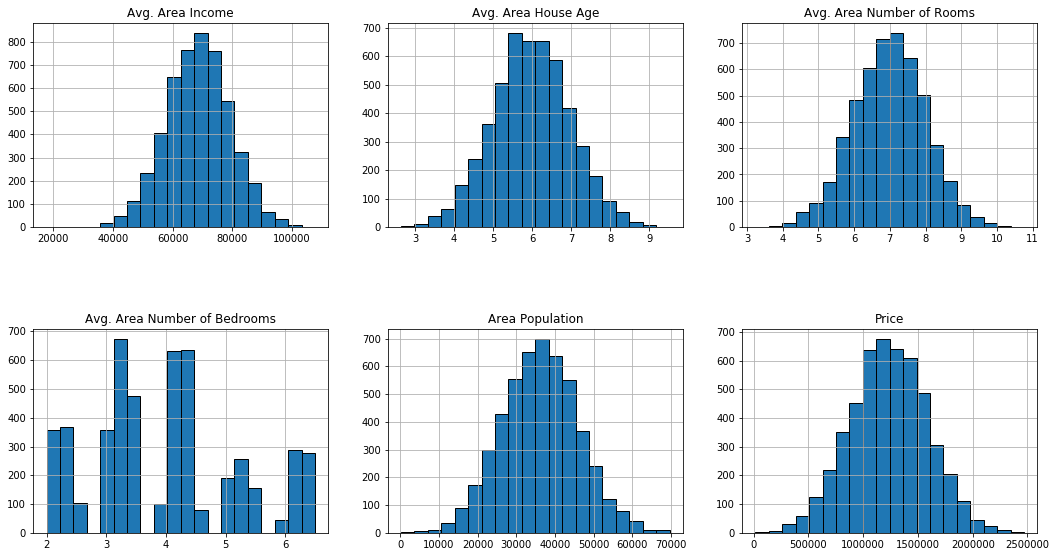

In [6]:
import itertools
columns=df.columns[:6]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

data distribution for all column is normal and linear.

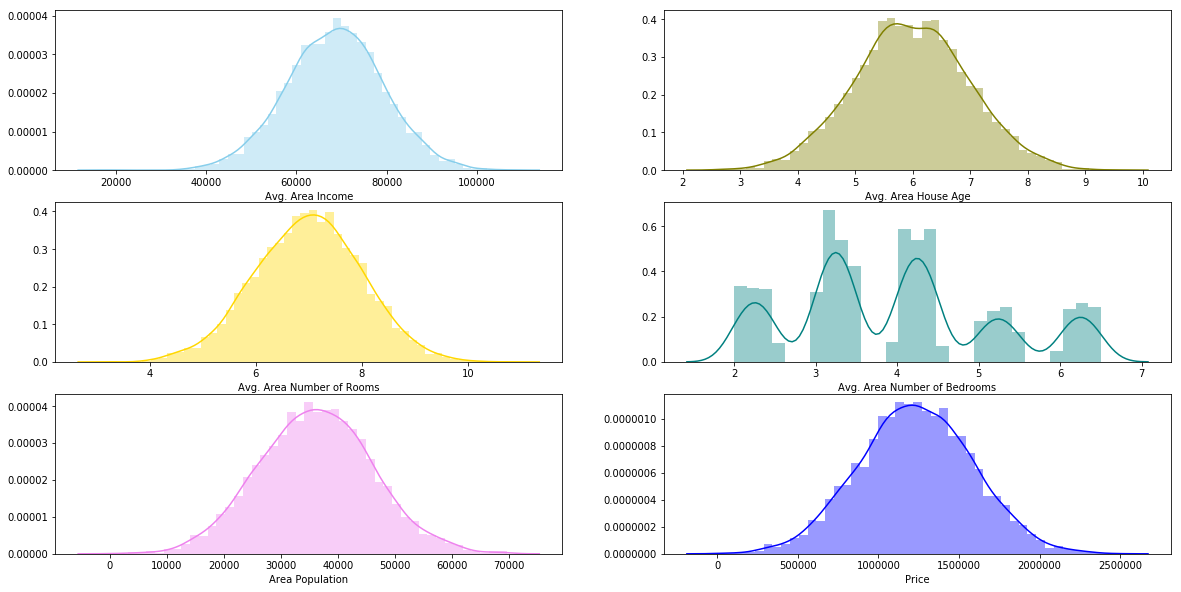

In [7]:
f, axes = plt.subplots(3,2, figsize=(20, 10), sharex=False)
# False is default for displaying both x and y axis. Truex=Display only x.
sns.distplot(df["Avg. Area Income"], color="skyblue", ax=axes[0, 0])
sns.distplot(df["Avg. Area House Age"] , color="olive", ax=axes[0, 1])
sns.distplot(df["Avg. Area Number of Rooms"] , color="gold", ax=axes[1, 0])
sns.distplot(df["Avg. Area Number of Bedrooms"] , color="teal", ax=axes[1, 1])
sns.distplot(df["Area Population"] , color="violet", ax=axes[2, 0])
sns.distplot(df["Price"] , color="blue", ax=axes[2, 1])

In [8]:
df = df.rename(columns = {"Avg. Area Income": "AvgAreaIncome","Avg. Area House Age": "AvgAreaHouseAge","Avg. Area Number of Rooms": "AvgAreaNumberOfRooms","Avg. Area Number of Bedrooms": "AvgAreaNumberOfBedrooms","Area Population": "AreaPopulation"  }) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
AvgAreaIncome              5000 non-null float64
AvgAreaHouseAge            5000 non-null float64
AvgAreaNumberOfRooms       5000 non-null float64
AvgAreaNumberOfBedrooms    5000 non-null float64
AreaPopulation             5000 non-null float64
Price                      5000 non-null float64
Address                    5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


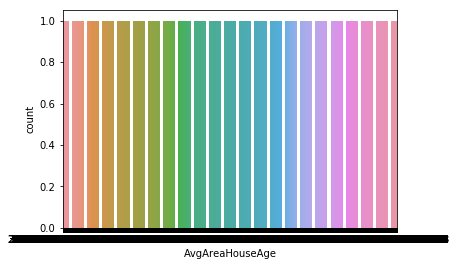

In [10]:
sns.countplot(df.AvgAreaHouseAge)

In [11]:
df.AvgAreaNumberOfRooms.nunique() 

5000

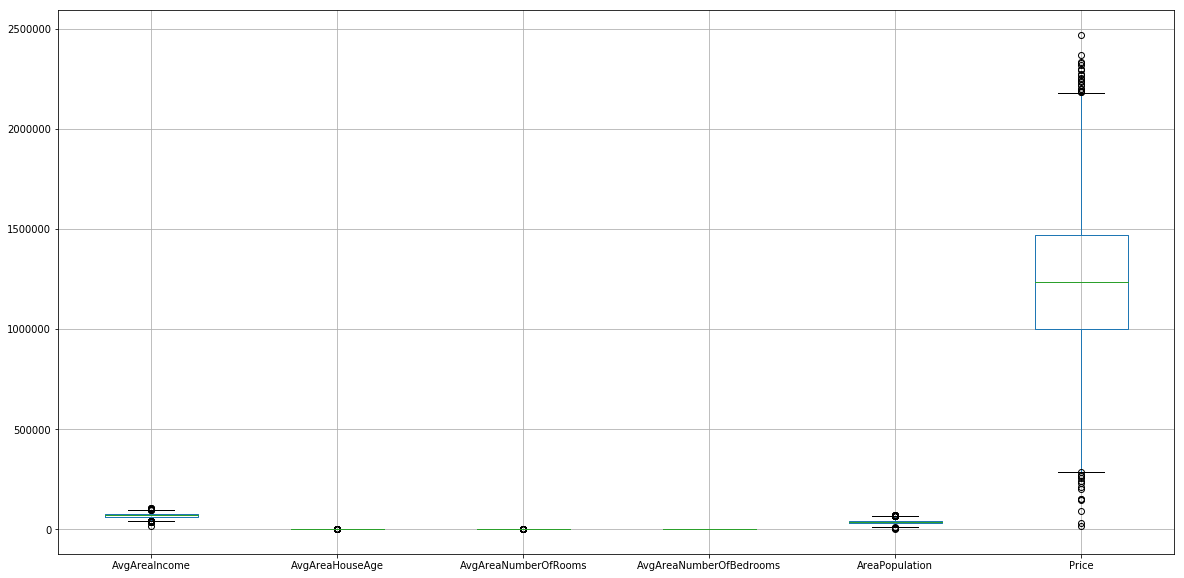

In [12]:
ax = plt.subplots(figsize=(20,  10))
df.boxplot()

In [13]:
df["AvgAreaHouseAge"] = df["AvgAreaHouseAge"].astype(int)
df["AvgAreaNumberOfRooms"] = df["AvgAreaNumberOfRooms"].astype(int)
df["AvgAreaNumberOfBedrooms"] = df["AvgAreaNumberOfBedrooms"].astype(int)
print(df.head())

   AvgAreaIncome  AvgAreaHouseAge  AvgAreaNumberOfRooms  \
0   79545.458574                5                     7   
1   79248.642455                6                     6   
2   61287.067179                5                     8   
3   63345.240046                7                     5   
4   59982.197226                5                     7   

   AvgAreaNumberOfBedrooms  AreaPopulation         Price  \
0                        4    23086.800503  1.059034e+06   
1                        3    40173.072174  1.505891e+06   
2                        5    36882.159400  1.058988e+06   
3                        3    34310.242831  1.260617e+06   
4                        4    26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4        

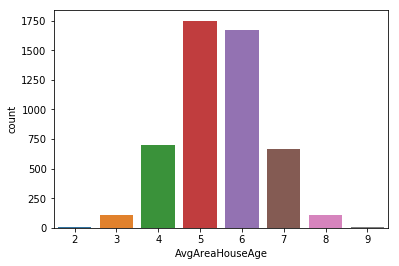

In [14]:
sns.countplot(df.AvgAreaHouseAge)

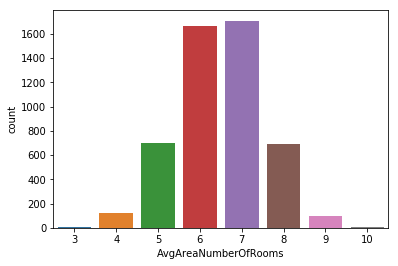

In [15]:
sns.countplot(df.AvgAreaNumberOfRooms)

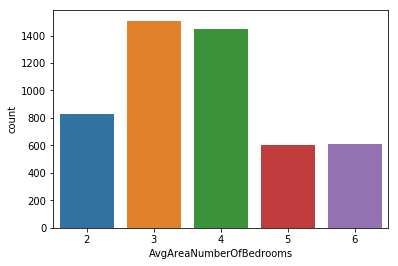

In [16]:
sns.countplot(df.AvgAreaNumberOfBedrooms)

From above plotting we can infer that data is normally distribute.
Average area house age is concetrated in 5,6
Average area number of rooms is 6,7
Average area number of Bedrooms is 3,4

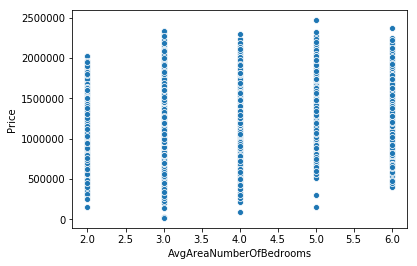

In [17]:
sns.scatterplot(x='AvgAreaNumberOfBedrooms', y ='Price',data = df)

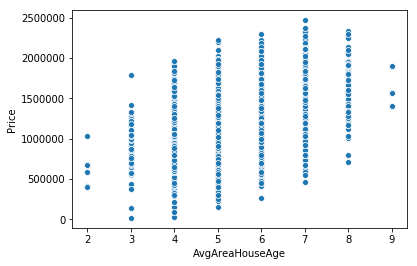

In [18]:
sns.scatterplot(x='AvgAreaHouseAge', y ='Price',data = df)

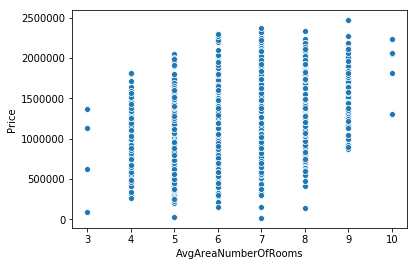

In [19]:
sns.scatterplot(x='AvgAreaNumberOfRooms', y ='Price',data = df)

from above scatterplot we observe that cost of house and number of rooms and bed rooms have relations.

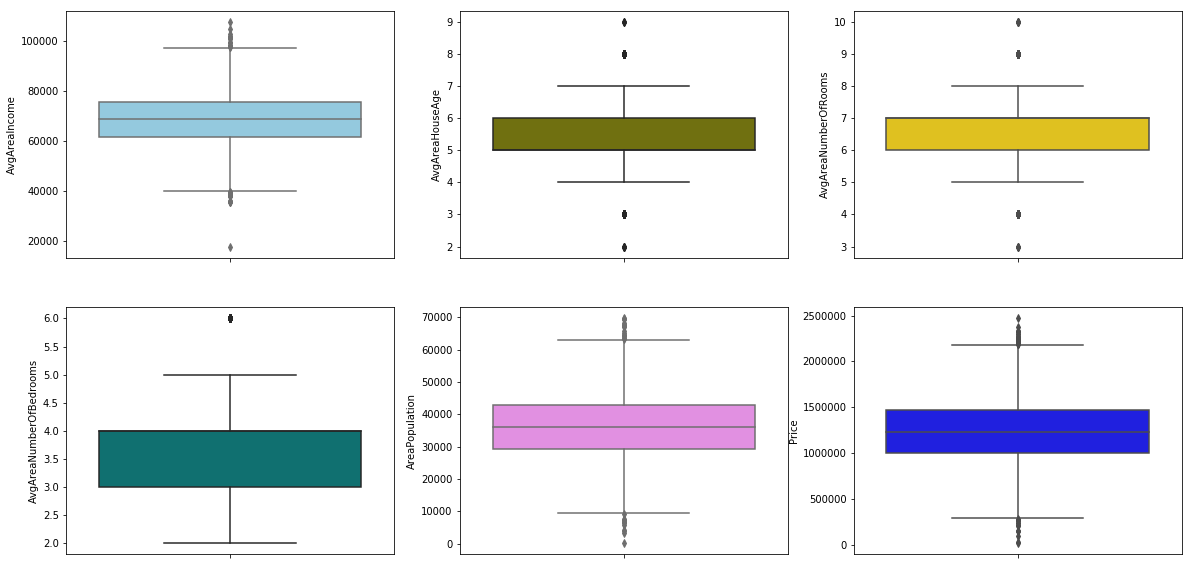

In [20]:
f, axes = plt.subplots(2,3, figsize=(20, 10), sharex=True)
sns.boxplot(y=df["AvgAreaIncome"], color="skyblue", ax=axes[0, 0])
sns.boxplot(y=df["AvgAreaHouseAge"] , color="olive", ax=axes[0, 1])
sns.boxplot(y=df["AvgAreaNumberOfRooms"] , color="gold", ax=axes[0, 2])
sns.boxplot(y=df["AvgAreaNumberOfBedrooms"] , color="teal", ax=axes[1, 0])
sns.boxplot(y=df["AreaPopulation"] , color="violet", ax=axes[1, 1])
sns.boxplot(y=df["Price"] , color="blue", ax=axes[1, 2])

Observations [The chart gives us a fair idea on the range and outliers of data ]
Price: Quartile Range: 1e+6 to 1.5e+6 (Q1 and Q3). Outliers: <0.35e+6 and >2.25e+6, Mean: 1.23e+6
Income: Quartile Range: 61,000 to 78,000. Outliers: <40,000 and >1,00,000.
Population: Quartile Range: 30,000 to 42,500. Outliers: <10,000 and >65,000.
Total Rooms: Quartile Range: 6.5 to 7.5. Outliers: <4.25 and >9.8.
Bedrooms: Quartile Range: 3.1 to 4.5. Outliers: <2 and >6.5.
Age : Quartile Range: 5.5 to 6.5. Outliers: <3.25 and >8.75.

## Splitting dataset into training and testing set : using train_test_split method Training Data

In [21]:
# By convention we mark "X"(Cap) as independent variable and 'y'(small) as dependent variable ; y=b0X0+m1X1+m2X2....mnXn.
# Next we take out the dependent variable and seperate the DV and IV, i.e. temp drop the DV and assign all IV as dataset
X = df.drop(['Price','Address'],axis = 1) # return all i.e. IVs while temporarily dropping only the DV column (axis = 1, means column)
# Here we are capturing the IVs and storing it in X.## Address dropped as irrelevant variable.
y = df.Price ## return dataset , now without the DV column. Here we are capturing the DV and storing it in y.
print(X.head()) # return X (IV)
print('\n') # return a seperation line
print(y.head()) # return y (DV)

   AvgAreaIncome  AvgAreaHouseAge  AvgAreaNumberOfRooms  \
0   79545.458574                5                     7   
1   79248.642455                6                     6   
2   61287.067179                5                     8   
3   63345.240046                7                     5   
4   59982.197226                5                     7   

   AvgAreaNumberOfBedrooms  AreaPopulation  
0                        4    23086.800503  
1                        3    40173.072174  
2                        5    36882.159400  
3                        3    34310.242831  
4                        4    26354.109472  


0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64


In [22]:
#Syntax when required for Feature Scaling (Automated for Multiple Linear Regression), Not required here.
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

In [23]:
# Splitting the data into Train-Test using the sklearn library
from sklearn.model_selection import train_test_split # importing the method of train_test_split from sklearn library
X_train,X_test, y_train, y_test = train_test_split (X,y,test_size= 0.3, random_state = 0)
# test_size defines my % of testing data. X_train and y_train are my training data as IVs and DVs respectively.Do for testing.
#random state will allow all the users collaborate or have same set of random numbers
print(X_train[0:10]) # randomly return the IVs on training side ## displayingthe first 5 rows
print('\n *y_train* \n')
print(y_train[0:10]) # randomly return the corresponding DVs on training side

      AvgAreaIncome  AvgAreaHouseAge  AvgAreaNumberOfRooms  \
2858   77947.464364                6                     7   
1559   69931.401100                6                     5   
1441   65841.308786                5                     6   
2179   73682.486209                4                     5   
1390   72813.801687                8                     8   
2575   65244.876417                7                     7   
467    69230.749740                6                     5   
4448   83774.543297                7                     9   
276    55702.205376                5                     5   
1046   70775.434884                6                     6   

      AvgAreaNumberOfBedrooms  AreaPopulation  
2858                        5    29660.796580  
1559                        2    52079.188183  
1441                        2    48253.276636  
2179                        2    34366.180100  
1390                        3    35014.848214  
2575                        6

## Test Data

In [24]:
print(X_test[0:10])
print('\n *y_test* \n')
print(y_test[0:10])

      AvgAreaIncome  AvgAreaHouseAge  AvgAreaNumberOfRooms  \
398    61200.726175                5                     6   
3833   63380.814670                5                     6   
4836   71208.269301                5                     6   
4572   50343.763518                6                     5   
636    54535.453719                5                     6   
2545   77459.757856                4                     5   
1161   44088.274183                7                     5   
2230   58874.273843                6                     6   
148    90975.113272                4                     8   
2530   77825.227469                6                     7   

      AvgAreaNumberOfBedrooms  AreaPopulation  
398                         4    42789.692217  
3833                        2    40217.333577  
4836                        4    25696.361741  
4572                        4    27445.876739  
636                         4    30852.207006  
2545                        4

## Build the Model, Check the Coeff and Intercepts Feeding Multiple Linear Regression to the Algorithm

In [25]:
# Fitting Multiple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression # importing the LinearRegression algorithm from the scikit library
regressor = LinearRegression() # creating/defining an instance (data object) f the LinearRegression algorithm
regressor.fit(X_train,y_train) # Using 'dot fit' function to feed my trainingdata to the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Calling Algorith to provide the coefficient(m) and constant(c) for linear regression y= mX + c, single IV.

In [26]:
print("Intercept=",regressor.intercept_) # intercept is the constant "c", where my X=0 i.e IV = 0.
print('\n')
print("Regression Coeff=", regressor.coef_) # gives coefficients m1, m2, m3,...

Intercept= -2352122.076255726


Regression Coeff= [2.14884204e+01 1.52344889e+05 1.11275452e+05 1.41789888e+03
 1.51064630e+01]


In [27]:
# Predicting the DV from Testset result as Pi againt Ai (actual DV) as y_pred
y_pred = regressor.predict(X_test)
print(y_pred[0:10])
print('\n *Original Values of DV*')
print(y_test[0:10])

[1044434.50426747 1049586.12401477 1001261.03410022  620414.18397795
  720875.14981614 1056484.63752229  689690.23142488  796243.7754298
 1782002.91271815 1495252.87594105]

 *Original Values of DV*
398     8.942511e+05
3833    9.329794e+05
4836    9.207479e+05
4572    6.918549e+05
636     7.327332e+05
2545    9.452522e+05
1161    6.244828e+05
2230    8.495661e+05
148     1.544380e+06
2530    1.535262e+06
Name: Price, dtype: float64


## Getting the error RMSE from the performance metrix

In [28]:
from sklearn import metrics

In [29]:
#The lower the metrix, the better the model is
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 91576.9767548494
MSE: 13135853874.140253
RMSE: 114611.75277492379


In [30]:
#from sklearn.model_selection import cross_val_score - VERIFY
print('Explained Variance Score:', metrics.explained_variance_score(y_test,y_pred)*100)
# Higher the variance score the better.

Explained Variance Score: 89.86149623908169


## Getting my R2 and adjusted R2 ## adjusted R2 helps in case of IV > 1 for default dataset without 'address'

In [31]:
from sklearn.model_selection import cross_val_score
regression_avg=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv= 10, scoring='neg_median_absolute_error')
print(regression_avg.mean())
from sklearn.model_selection import cross_val_score
regression_avg=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv= 10,scoring='explained_variance')
print(regression_avg.mean()*100)
print(regression_avg.std()*100)

-79089.79498727844
88.94370198506533
0.7862138944089812


## Observation: MAE, Test = 81517.56 and MAE, CV = 69812.5. Mean r2,CV = 91.63 and STDEV,CV= 0.74
Less variation in r2 of test and validation signify an efficient regression model. Low SDV shows normal
distribution.

## Visualizing correlation and linearity of dataset 

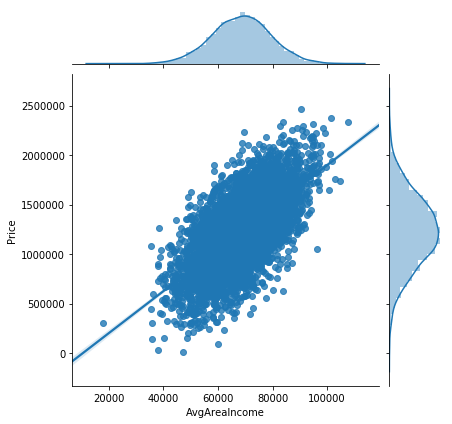

In [32]:
sns.jointplot(x = "AvgAreaIncome", y = 'Price', data = df, kind = 'reg')

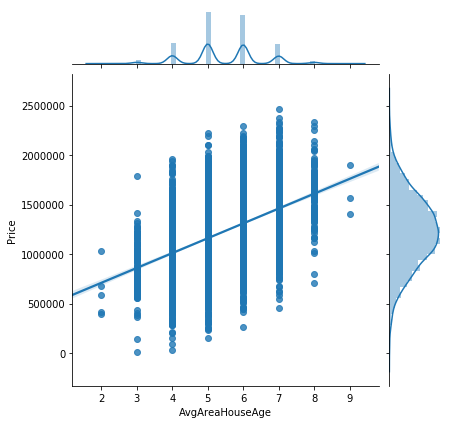

In [33]:
sns.jointplot(x = "AvgAreaHouseAge", y = 'Price', data = df, kind = 'reg')

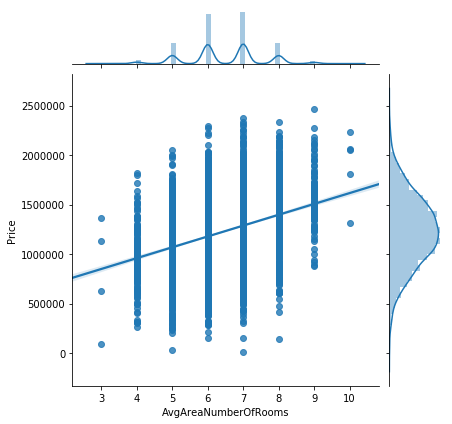

In [34]:
sns.jointplot(x = "AvgAreaNumberOfRooms", y = 'Price', data = df, kind = 'reg')

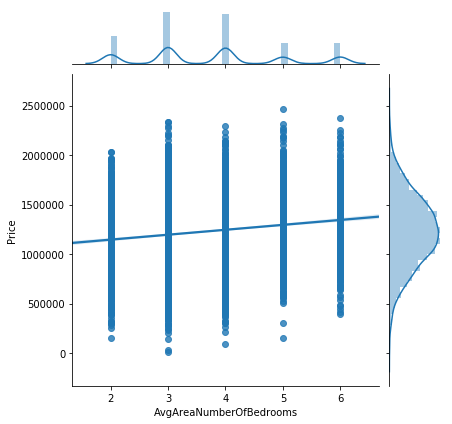

In [35]:
sns.jointplot(x = "AvgAreaNumberOfBedrooms", y = 'Price', data = df, kind = 'reg')

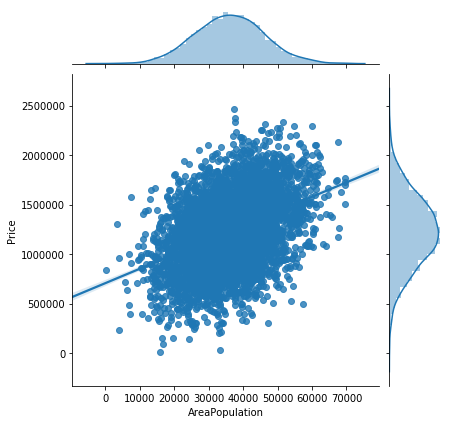

In [36]:
sns.jointplot(x = "AreaPopulation", y = 'Price', data = df, kind = 'reg')

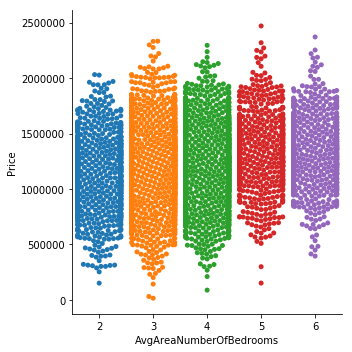

In [37]:
sns.catplot(x="AvgAreaNumberOfBedrooms",y = 'Price', data = df, kind = 'swarm')

Observation: No. of bedroom have overlapping affect on the price but looks linear. All factors have +ve
correlations.

## Code to Automate Backward elimination

In [50]:
# fitting data to algorithm
import numpy as np
import pandas as pd
df=pd.read_csv('USA_Housing.csv')
df.head()
## Convert Non Numerical Categorical column into numeric ones
##Check the categories which are non numerical
#categoryList = list(df.select_dtypes(include=['object']).columns)
##Create dummy variables for non numerical categorical variables
#dummies = pd.get_dummies(df[categoryList], prefix=categoryList)
#print(dummies.head())
df.drop(['Address'], axis = 1, inplace = True)
#print(df.head())
#print('\n')
#df=pd.concat([df,dummies], axis=1)
#df.head()
X = df.drop(['Price'], axis=1)
y = df.Price
X=np.append(arr = np.ones((5000,1)).astype(int),values=X, axis=1)
# axis=1 means add columns,50=total number of rows/
# it creates 50*1 metrix

In [51]:
X[0]

array([1.00000000e+00, 7.95454586e+04, 5.68286132e+00, 7.00918814e+00,
       4.09000000e+00, 2.30868005e+04])

## Backword Elimination Function

In [55]:
import statsmodels.regression.linear_model as sm # calling the statsmodel for auto BackwardElimination
def backwardElimination(x, sl): ## function which accepts X and significance level
    numVars = len(x[0]) ## reading all rows
    for i in range(0, numVars): ## iterating through the rows
        regressor_OLS = sm.OLS(y, x).fit() # finding the p-values
        maxVar = max(regressor_OLS.pvalues)#.astype(float) ## getting the variables with max p-value
        if maxVar > sl: ## checking if its greater than the significance level ( in this case 0.05)
            for j in range(0, numVars - i): ## since python starts from 0, we need to adjust the index
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1) ## delete that unimportantvariable
                
    regressor_OLS.summary()
    return x

In [56]:
SL = 0.05 ## try with 0.08
X = backwardElimination(X, SL)
X[0] # Calculated values of constant and coefficients respectively.

array([1.00000000e+00, 7.95454586e+04, 5.68286132e+00, 7.00918814e+00,
       2.30868005e+04])

In [57]:
X=X[:,[1,2,3,4]] # calling the variable factors alone without the constant 1.

In [58]:
print(df.head()) # calling the original data (object column permenantly dropped previously)
print('\n')
print(X[0]) # calling the coefficients post aut-BackwardElimination

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06  
3                          3.26     34310.242831  1.260617e+06  
4                          4.23     26354.109472  6.309435e+05  


[7.95454586e+04 5.68286132e+00 7.00918814e+00 2.30868005e+04]


In [59]:
# importing train test split
#fitting the train values to linear regression algorithm
#predicting the values
#Splitiing for Train Test
from sklearn.model_selection import train_test_split # importing the method of train_test_split from sklearn library
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression # importing the LinearRegression algorithm from the scikit library
regressor=LinearRegression() # creating/defining an instance (data object) of the LinearRegression algorithm
regressor.fit(X_train,y_train) # Using 'dot fit' function to feed my training data to the algorithm
# Predicting the DV from Testset result as Pi againt Ai (actual DV) as y_pred
y_pred = regressor.predict(X_test)
print(y_pred[0:10])
print('\n')
print(y_test[0:10])

[ 969680.01896429  956745.29842869  906429.64259327  490084.67266655
  716647.72481734 1047799.81736595  714249.16325884  790436.77174816
 1800683.16224418 1536848.66873437]


398     8.942511e+05
3833    9.329794e+05
4836    9.207479e+05
4572    6.918549e+05
636     7.327332e+05
2545    9.452522e+05
1161    6.244828e+05
2230    8.495661e+05
148     1.544380e+06
2530    1.535262e+06
Name: Price, dtype: float64


In [61]:
from sklearn import metrics # Evaluation of error matrix and line of goodness with BackwardElimination
print('MAE=',metrics.mean_absolute_error(y_test,y_pred))
print('MSE=', metrics.mean_squared_error(y_test,y_pred))
print('RMSE=', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score =',metrics.explained_variance_score(y_test,y_pred)*100)
#importing cross validation while giving validation parameters
from sklearn.model_selection import cross_val_score
regressor_avg=cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring='neg_mean_absolute_error')
print('Cross val MEan Abs Error=',regressor_avg.mean())
from sklearn.model_selection import cross_val_score
regressor_avg=cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring='explained_variance')
print('Cross val Explained Variance =',regressor_avg.mean()*100)
from sklearn.metrics import r2_score
print('r2 =',r2_score(y_test,y_pred))
adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1-metrics.r2_score(y_test,y_pred))
print('adj_r2=',adj_r2)

MAE= 82542.71876454762
MSE= 10541345383.178274
RMSE= 102671.05426155063
Explained Variance Score = 91.47253645989713
Cross val MEan Abs Error= -81165.02274902757
Cross val Explained Variance = 91.80546691822963
r2 = 0.9147132206018312
adj_r2= 0.914370359177115


Model efficiency without backwardelimination:
r2: 0.9201
adjr2= 0.9198 Difference in adjr2 = 0.0003 reveals absence of any unnecessary data in the model.

## Final Technical Summary:
Samples for training - 70% of 5000 = 3500
Sample for testing - 30% = 1500
Sample for Cross Validation = 350
MAE: 82542.72
MSE: 10541345383.179794
RMSE: 102671.05
r2: 0.9147
adjr2= 0.9143

*Inference Based on data provided we forsee a 91.44% confidence level on the Price declared.*

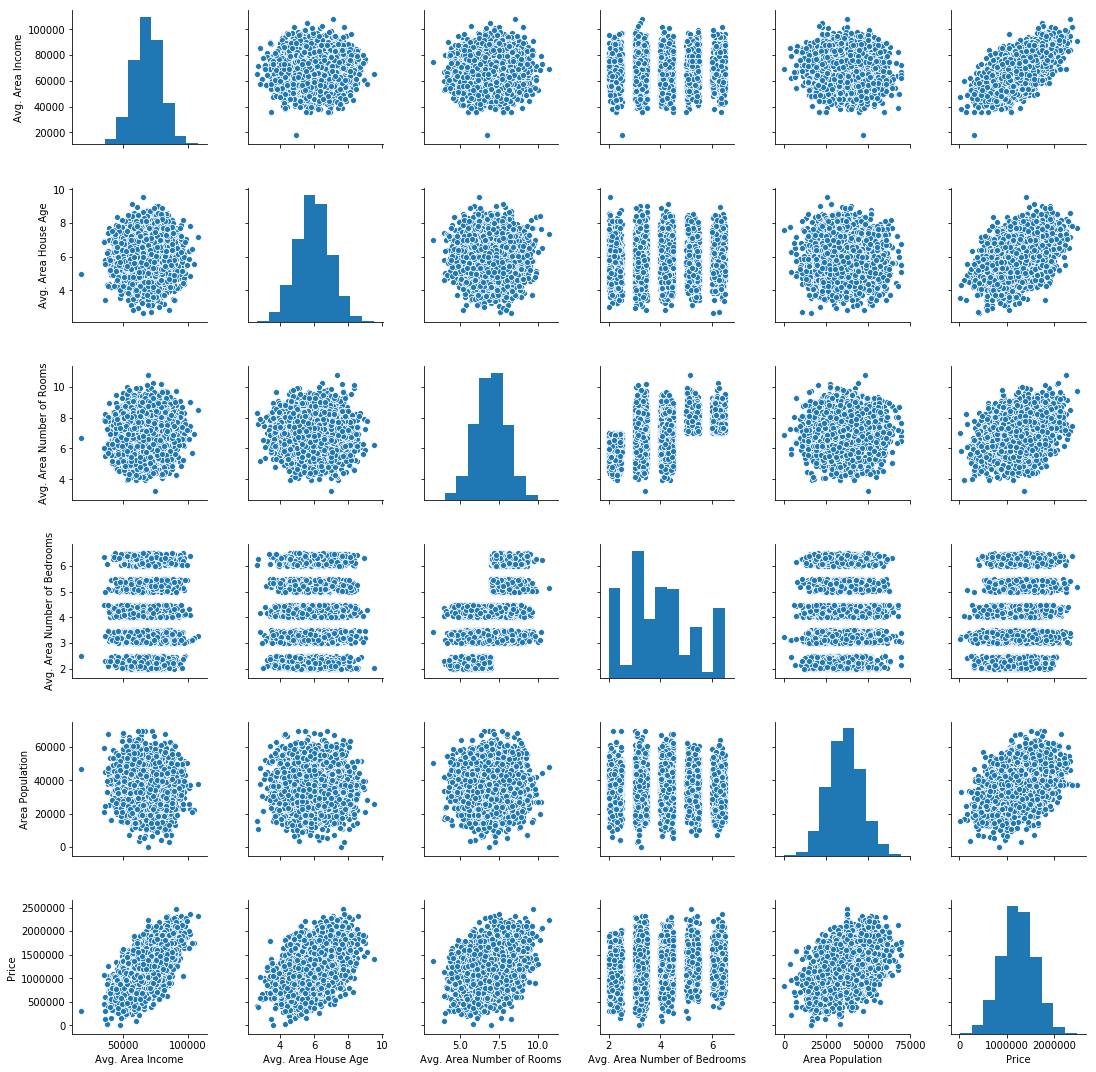

In [62]:
sns.pairplot(df) # Graphical representation of individual variables on each other.

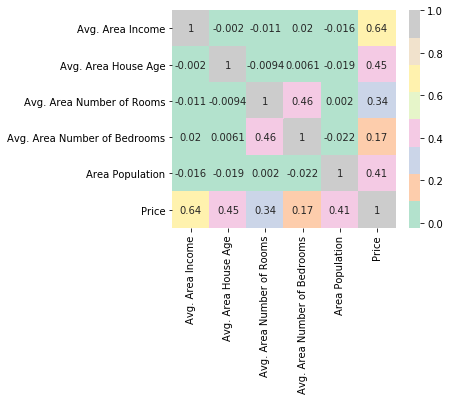

In [63]:
corr = df.corr() # graphical representation of correlation on variables.
plt.figure(figsize=(5,4))
sns.heatmap(corr,annot=True,cmap= 'Pastel2')

## Conclusion:

**Ethical Declaration**:
Samples for training - 70% of 5000 = 3500
Sample for testing - 30% = 1500
Sample for Cross Validation = 350
MAE: 82542.72
MSE: 10541345383.179794
RMSE: 102671.05
r2: 0.9147
adjr2= 0.9143

**Statistical Information:**
Nominal Price Range: 1000000 to 1500000, Average: 1230000. Min:15938, Max:2469066.
Nominal Income Range: 61,000 to 78,000. Average : 68583. Min:17798, Max:107701.
Nominal Population Range: 30,000 to 42,500. Average : 36164. Min:174, Max:69622.
Nominal Total Rooms: 6.5 to 7.5. Average: 7. Min:3, Max:11.
Nominal Bedrooms: 3.1 to 4.5. Average: 4. Min:2, Max:7.
Nominal Age : 5.5 to 6.5. Average: 6. Min:2.6, Max:9.5.

**Conclude: From the given data and based on parameters we can predict with 91.44% confidence level
the declared value of Prices.**